In [1]:
!pip install -U imbalanced-learn

    100% |████████████████████████████████| 174kB 11.2MB/s ta 0:00:01
Requirement not upgraded as not directly required: numpy>=1.11 in /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages (from imbalanced-learn) (1.16.4)
Requirement not upgraded as not directly required: scipy>=0.17 in /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages (from imbalanced-learn) (1.3.0)
Requirement not upgraded as not directly required: scikit-learn>=0.21 in /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages (from imbalanced-learn) (0.21.2)
Requirement not upgraded as not directly required: joblib>=0.11 in /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages (from imbalanced-learn) (0.13.2)
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE, ADASYN

Using TensorFlow backend.


In [3]:
RANDOM_SEED = 314 #used to help randomly select the data points
TEST_PCT = 0.3 # 20% of the data

In [4]:
dataset = pd.read_csv('creditcard2.csv', delimiter=',')
# split into input (X) and output (y) variables

In [5]:
dataset = dataset.drop(['Time','Amount'],axis=1)

In [6]:
from sklearn.model_selection import train_test_split
# 80% for the training set and 20% for the testing set
train, test = train_test_split(dataset, test_size=TEST_PCT,random_state=RANDOM_SEED)

In [7]:
X = train.iloc[:, 0:28]
y = train.iloc[:,28:29]

In [8]:
 from collections import Counter

In [9]:
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[(0, 199036), (1, 199036)]


In [10]:
X = X_resampled
y = y_resampled
print(sorted(Counter(y).items()))

[(0, 199036), (1, 199036)]


In [11]:
# define the keras model
model = Sequential()
model.add(Dense(28, input_dim=28, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset

W1108 19:40:35.174302 140413557581632 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1108 19:40:35.189141 140413557581632 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1108 19:40:35.191180 140413557581632 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1108 19:40:35.219061 140413557581632 deprecation_wrapper.py:119] From /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.t

In [24]:
model.fit(X, y, epochs=200, batch_size=1000)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/200
398072/398072 [==============================] - 2s 4us/step - loss: 9.9827e-05 - acc: 1.0000
Epoch 2/200
398072/398072 [==============================] - 2s 4us/step - loss: 7.5616e-05 - acc: 1.0000
Epoch 3/200
398072/398072 [==============================] - 2s 4us/step - loss: 7.1521e-05 - acc: 1.0000
Epoch 4/200
398072/398072 [==============================] - 2s 4us/step - loss: 7.2626e-05 - acc: 1.0000
Epoch 5/200
398072/398072 [==============================] - 2s 4us/step - loss: 7.7697e-05 - acc: 1.0000
Epoch 6/200
398072/398072 [==============================] - 2s 4us/step - loss: 7.8348e-05 - acc: 1.0000
Epoch 7/200
398072/398072 [==============================] - 2s 4us/step - loss: 7.6517e-05 - acc: 1.0000
Epoch 8/200
398072/398072 [==============================] - 2s 4us/step - loss: 7.7302e-05 - acc: 1.0000
Epoch 9/200
398072/398072 [==============================] - 2s 4us/step - loss: 8.0442e-05 - acc: 1.0000
Epoch 10/200
398072/398072 [==================

398072/398072 [==============================] - 2s 4us/step - loss: 7.3551e-05 - acc: 1.0000
Epoch 78/200
398072/398072 [==============================] - 2s 4us/step - loss: 6.6648e-05 - acc: 1.0000
Epoch 79/200
398072/398072 [==============================] - 2s 4us/step - loss: 7.0294e-05 - acc: 1.0000
Epoch 80/200
398072/398072 [==============================] - 2s 4us/step - loss: 6.4170e-05 - acc: 1.0000
Epoch 81/200
398072/398072 [==============================] - 2s 4us/step - loss: 7.1278e-05 - acc: 1.0000
Epoch 82/200
398072/398072 [==============================] - 2s 4us/step - loss: 6.1422e-05 - acc: 1.0000
Epoch 83/200
398072/398072 [==============================] - 2s 4us/step - loss: 7.4768e-05 - acc: 1.0000
Epoch 84/200
398072/398072 [==============================] - 2s 4us/step - loss: 6.6507e-05 - acc: 1.0000
Epoch 85/200
398072/398072 [==============================] - 2s 4us/step - loss: 7.9416e-05 - acc: 1.0000
Epoch 86/200
398072/398072 [======================

398072/398072 [==============================] - 2s 4us/step - loss: 6.0835e-05 - acc: 1.0000
Epoch 154/200
398072/398072 [==============================] - 2s 4us/step - loss: 7.3223e-05 - acc: 1.0000
Epoch 155/200
398072/398072 [==============================] - 2s 4us/step - loss: 7.0328e-05 - acc: 1.0000
Epoch 156/200
398072/398072 [==============================] - 2s 4us/step - loss: 8.1340e-05 - acc: 1.0000
Epoch 157/200
398072/398072 [==============================] - 2s 4us/step - loss: 8.0485e-05 - acc: 1.0000
Epoch 158/200
398072/398072 [==============================] - 2s 4us/step - loss: 5.6938e-05 - acc: 1.0000
Epoch 159/200
398072/398072 [==============================] - 2s 4us/step - loss: 5.7497e-05 - acc: 1.0000
Epoch 160/200
398072/398072 [==============================] - 2s 4us/step - loss: 6.4152e-05 - acc: 1.0000
Epoch 161/200
398072/398072 [==============================] - 2s 4us/step - loss: 5.9308e-05 - acc: 1.0000
Epoch 162/200
398072/398072 [=============

In [25]:
x_test = test.iloc[:, 0:28]
y_true = test.iloc[:,28:29]

In [26]:
y_pred = model.predict(x_test)

In [27]:
y_pred = (y_pred > 0.5)

In [28]:
import numpy as np

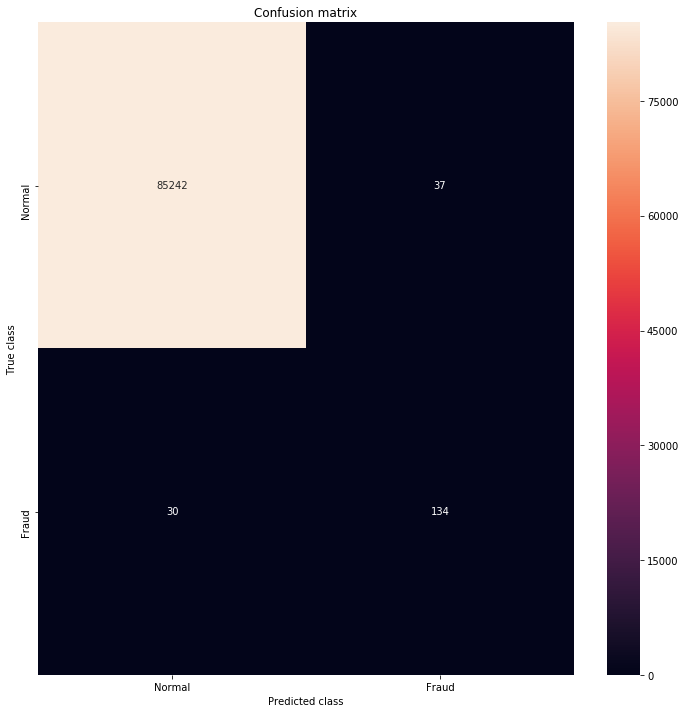

In [29]:
from sklearn.metrics import confusion_matrix, precision_recall_curve
import seaborn as sns
import matplotlib.pyplot as plt
LABELS = ["Normal","Fraud"]
conf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)
tn, fp, fn, tp = conf_matrix.ravel() 
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85279
           1       0.78      0.82      0.80       164

    accuracy                           1.00     85443
   macro avg       0.89      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [31]:
from sklearn.metrics import classification_report, accuracy_score

In [32]:
print ("Accuracy Score: ", accuracy_score(y_true, y_pred))

Accuracy Score:  0.9992158515033414


In [33]:
from sklearn.metrics import classification_report, precision_score

In [34]:
print ("Precision Score: ", precision_score(y_true, y_pred))

Precision Score:  0.783625730994152
